In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from transformers import ClusterSimilarity
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.graph_objects as go   
import plotly.express as px

In [32]:
df = pd.read_csv("data/belgian_property_prices.csv")
df = df.dropna(subset=["lat"])
df["price_norm"] = np.log(df.price)

c:\Repositories\OpenUniversiteit\BelgianHousingPrices\house-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Repositories\OpenUniversiteit\BelgianHousingPrices\house-env\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Repositories\OpenUniversiteit\BelgianHousingPrices\house-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Repositories\OpenUniversiteit\BelgianHousingPrices\house-env\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Repositories\OpenUniversiteit\BelgianHousingPrices\house-env\lib\site-packages\skle

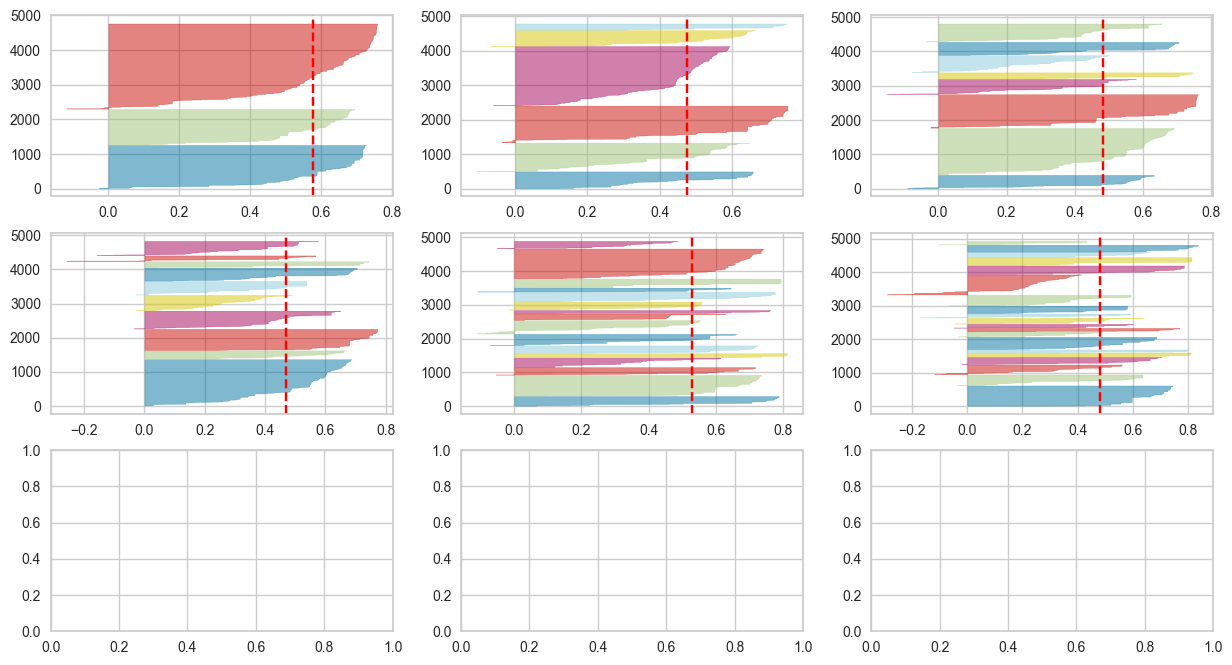

In [33]:
fig, ax = plt.subplots(3,3, figsize=(15,8))
for index, i in enumerate([3,6,8,10,16,20]):
    '''
    Create KMeans instances for different number of clusters
    '''
    cluster_simil = ClusterSimilarity(columns=["lat", "lng"], n_clusters=i, gamma=1., random_state=42)
    similarities = cluster_simil.fit_transform(df,
    sample_weight=df.price)
    q, mod = divmod(index, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(cluster_simil.kmeans_, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(df[["lat", "lng"]]) 

In [34]:
cluster_simil = ClusterSimilarity(columns=["lat", "lng"], n_clusters=8, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(df, sample_weight=df.price)

c:\Repositories\OpenUniversiteit\BelgianHousingPrices\house-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [60]:
fig = px.density_mapbox(df, lat = 'lat', lon = 'lng', z = 'price',
                        radius = 10,
                        center = dict(lat = 50.85, lon = 4.35),
                        zoom = 6,
                        opacity=0.8,
                        mapbox_style = 'carto-positron',
                        width=700,
                        height=600)

fig.add_trace(go.Scattermapbox(
    lat=cluster_simil.kmeans_.cluster_centers_[:, 0],
    lon=cluster_simil.kmeans_.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(size=15, color='#08f26e'),
    text='Cluster Centers'
))

fig.show()

In [ ]:
df.plot(kind="scatter", x="lng", y="lat", grid=True, alpha=0.2, c="price_norm", cmap="jet", colorbar=True, legend=True, sharex= False, figsize=(10,7))
plt.scatter(cluster_simil.kmeans_.cluster_centers_[:, 1],cluster_simil.kmeans_.cluster_centers_[:, 0], s=100, c='red', marker='X', label='Cluster Centers')
plt.show()

In [ ]:
for i in range(1,17):
    df[f"cluster_{i}_similarity"] = similarities[:,i-1]

In [ ]:
df